In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime;

2022-11-13 23:45:34.808824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 23:45:34.925304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 23:45:34.925323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 23:45:34.950231: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 23:45:35.441049: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

for act_fun in [ACT_RELU, ACT_TANH, ACT_SIGMOID]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=act_fun),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=act_fun),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(act_fun)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

2022-11-13 23:45:36.141769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-13 23:45:36.141800: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-13 23:45:36.141815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-13 23:45:36.142336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       relu                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       relu                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)       tanh                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)       tanh                  
 4  3  MaxPooling2D                                   (2, 2)  (1, 1),
 0  n          type filters kernel_size activation pool_size strides
 1  0        Conv2D      32      (3, 3)    sigmoid                  
 2  1  MaxPooling2D                                   (2, 2)  (1, 1)
 3  2        Conv2D      64      (3, 3)    sigmoid                  
 4  3  MaxPooling2D             

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [5]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    all_history.append(history)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/5
422/422 [==============================] - 50s 117ms/step - loss: 0.1463 - accuracy: 0.9557 - val_loss: 0.0612 - val_accuracy: 0.9815
Epoch 2/5
422/422 [==============================] - 49s 116ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0369 - val_accuracy: 0.9898
Epoch 3/5
422/422 [==============================] - 48s 115ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 4/5
422/422 [==============================] - 49s 115ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0520 - val_accuracy: 0.9860
Epoch 5/5
422/422 [==============================] - 49s 115ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0426 - val_accuracy: 0.9895


 33%|███▎      | 1/3 [04:04<08:08, 244.30s/it]

Epoch 1/5
422/422 [==============================] - 52s 122ms/step - loss: 0.1718 - accuracy: 0.9486 - val_loss: 0.1183 - val_accuracy: 0.9670
Epoch 2/5
422/422 [==============================] - 47s 112ms/step - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0706 - val_accuracy: 0.9795
Epoch 3/5
422/422 [==============================] - 39s 92ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0618 - val_accuracy: 0.9833
Epoch 4/5
422/422 [==============================] - 39s 92ms/step - loss: 0.0474 - accuracy: 0.9854 - val_loss: 0.0489 - val_accuracy: 0.9867
Epoch 5/5
422/422 [==============================] - 39s 92ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0635 - val_accuracy: 0.9838


 67%|██████▋   | 2/3 [07:39<03:47, 227.41s/it]

Epoch 1/5
422/422 [==============================] - 39s 92ms/step - loss: 1.5260 - accuracy: 0.6195 - val_loss: 0.3981 - val_accuracy: 0.8723
Epoch 2/5
422/422 [==============================] - 39s 91ms/step - loss: 0.4061 - accuracy: 0.8736 - val_loss: 0.2803 - val_accuracy: 0.9173
Epoch 3/5
422/422 [==============================] - 38s 91ms/step - loss: 0.2840 - accuracy: 0.9146 - val_loss: 0.1791 - val_accuracy: 0.9532
Epoch 4/5
422/422 [==============================] - 38s 91ms/step - loss: 0.1830 - accuracy: 0.9448 - val_loss: 0.1159 - val_accuracy: 0.9683
Epoch 5/5
422/422 [==============================] - 38s 90ms/step - loss: 0.1210 - accuracy: 0.9640 - val_loss: 0.0788 - val_accuracy: 0.9785


100%|██████████| 3/3 [10:52<00:00, 217.46s/it]


In [6]:
# score = model.evaluate(x_test, y_test, verbose=0)

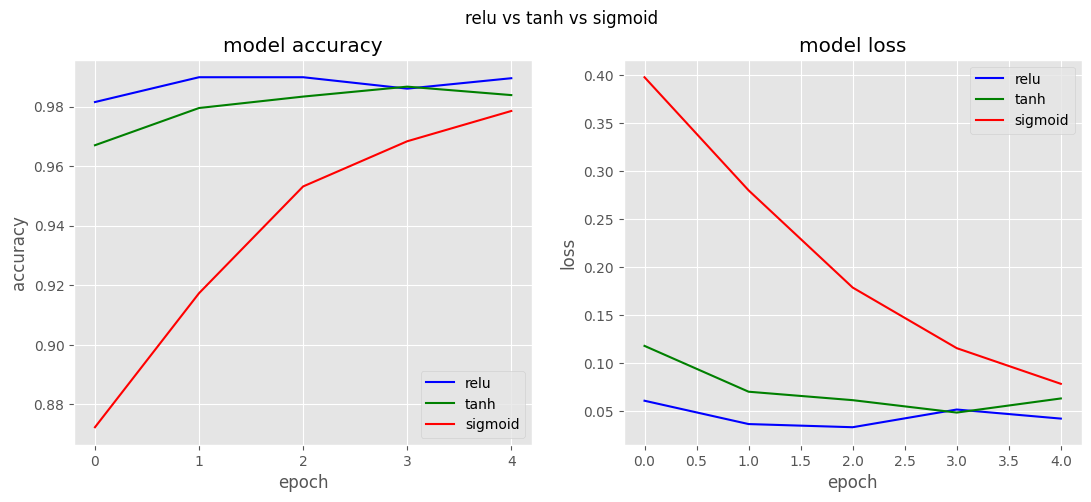

In [7]:
all_title = " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
plt.savefig(f'plots/{all_title}_{datetime.datetime.now()}.png')
plt.show()